In [26]:
### Idea for the Future:

# After we get the clusters of the MNIST dataset....make a classification model(a trained model that is trained to classif on similar type of dataset) that looks throught these cluster and classifes them to ceratin labels(if more then 50 percent of cluster are classifed by this model to be of say label-1 then we put all of the cluster in the label-1).....

# But this beats the whole purpose of using Autoencoder and Clustering for unsupervised learning(for classification task)....bcz this result can also be achieved by the second classifcation model that we have trained.......

In [27]:
# CLustering directly on high dim data......

In [28]:
# Import necessary library
import torch
from torch import nn
import matplotlib.pyplot as plt
import torchvision
from tqdm import tqdm

In [29]:
# Initalize the GPU for the model
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

### Method 1: Pass out MNIST Dataset into clustering algorithm(K-Means) and see its results.........If we can successfully classifiy by this method there is no need for AutoEncoder to convert our MNIST Data Image into latent representation

In [30]:
# Download the MNIST dataset

from torchvision import datasets
from torch.utils.data import ConcatDataset


train_data = datasets.MNIST(root='./',
                            train=True,
                            transform=torchvision.transforms.ToTensor(),
                            target_transform=None,
                            download=True)

test_data = datasets.MNIST(root='./',
                           train=False,
                           transform=torchvision.transforms.ToTensor(),
                           target_transform=None,
                           download=True)

# dataset = ConcatDataset([train_data, test_data])

In [31]:
# Create dataloaders

from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

In [32]:
# flatten the image data and store in an array....and also store the label in an array in similar order
# we are storing label for comparing our results after clustering (for ami score)
image_data, label = [data[0].flatten() for data in train_data], [label[1] for label in train_data]

In [33]:
# apply kmeans clustering on our image data and get the cluster data.....(cluster represents the labels)

from sklearn.cluster import KMeans

n_clusters = 10

kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(image_data)
cluster_labels = kmeans.labels_
cluster_labels

array([9, 8, 3, ..., 9, 0, 6], dtype=int32)

In [34]:
from sklearn.metrics import adjusted_mutual_info_score

kmeans_ami_score = adjusted_mutual_info_score(labels_true=label, labels_pred=cluster_labels)
kmeans_ami_score

0.49322244924432007

In [35]:
# compare the cluster results with the true labels

# NOTE: ami score is more appropriate evaluation metrics then the Accuracy percentage in clustering algorithm

import pandas as pd

df = pd.DataFrame([label, cluster_labels])

compare = (df.iloc[0] == df.iloc[1])

true_count = compare.sum()
false_count = (~compare).sum()
true_count, false_count

print(f'Correct Percentage: {(true_count / false_count) * 100:.2f} %')

Correct Percentage: 9.77 %


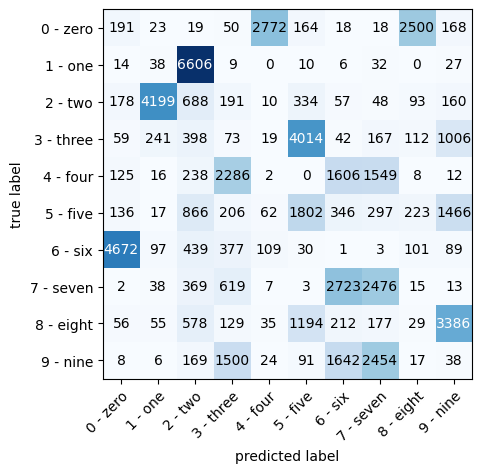

In [36]:
# Plot the confusion matrix for the cluster results and true labels...
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confusion_matrix = ConfusionMatrix(task='multiclass', num_classes=10)

confusion_matrix_tensor = confusion_matrix(torch.tensor(cluster_labels), torch.tensor(label))

fig, ax = plot_confusion_matrix(confusion_matrix_tensor.numpy(), 
                                class_names=test_data.classes)

In [37]:
# the cluster are scattered all around...meaning not a good result(not good clusters)..

In [38]:
dfkdfd

NameError: name 'dfkdfd' is not defined

### Method 2: Dimensionality Reduction Method (like t-sne and PCA [try both and see how they perform]) on the MNIST Image Dataset and then pass it through the K-Means Clustering to classify the Data

In [ ]:
from sklearn.manifold import TSNE
import numpy as np

tsne = TSNE(n_components=2)

# np.vstack([(data.numpy()) for data in image_data]).shape
X_embedded = tsne.fit_transform(np.vstack([data.numpy() for data in image_data]))

In [ ]:
# `X_embedded` is the tsne embedded data....now we pass this low-dimension reduced tsne-embedded-data into the K-Means.... and check the MNIST data classification...

In [ ]:
# Now we will cluster this data with K-Means Clustering and GMM(Gaussian Mixture Models)
cluster_labels = kmeans.fit_predict(X_embedded)
cluster_centers = kmeans.cluster_centers_

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=10)
gmm_labels = gmm.fit_predict(X_embedded)

In [ ]:
# plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1])

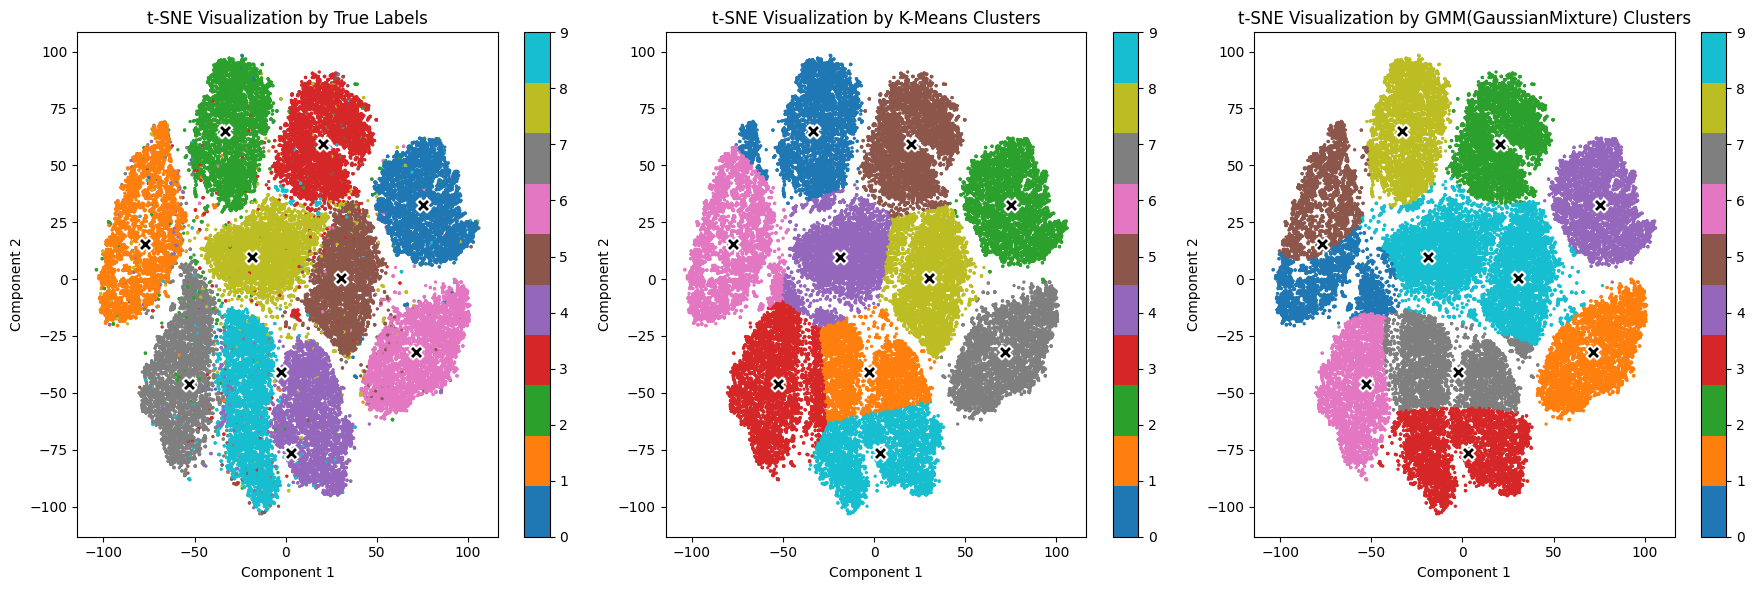

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

scatter1 = axes[0].scatter(X_embedded[:, 0], X_embedded[:, 1], c=label, cmap='tab10', s=2)
axes[0].scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='X', s=100, edgecolor='white', linewidth=1.5, label='Centers')
axes[0].set_title('t-SNE Visualization by True Labels')
axes[0].set_xlabel('Component 1')
axes[0].set_ylabel('Component 2')

scatter2 = axes[1].scatter(X_embedded[:, 0], X_embedded[:, 1], c=cluster_labels, cmap='tab10', s=2)
axes[1].scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='X', s=100, edgecolor='white', linewidth=1.5, label='Centers')
axes[1].set_title('t-SNE Visualization by K-Means Clusters')
axes[1].set_xlabel('Component 1')
axes[1].set_ylabel('Component 2')

scatter3 = axes[2].scatter(X_embedded[:, 0], X_embedded[:, 1], c=gmm_labels, cmap='tab10', s=2)
axes[2].scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='X', s=100, edgecolor='white', linewidth=1.5, label='Centers')
axes[2].set_title('t-SNE Visualization by GMM(GaussianMixture) Clusters')
axes[2].set_xlabel('Component 1')
axes[2].set_ylabel('Component 2')

cbar = plt.colorbar(scatter1)
cbar = plt.colorbar(scatter2)
cbar = plt.colorbar(scatter3)




plt.tight_layout()
plt.show()


In [ ]:
##### How AMI score works is .....
# Real-world analogy:
# Suppose you grouped animals into 3 clusters:
# Cluster A: cat, dog
# Cluster B: cow, goat
# Cluster C: tiger, lion

# If someone else labeled them:
# Cluster X: dog, cat
# Cluster Y: lion, tiger
# Cluster Z: goat, cow

# Even though the labels (A, B, C vs. X, Y, Z) don’t match, AMI would give a perfect score, because the groupings are structurally identical.

In [ ]:
# -----------------------------------------------
# NOTE: Evaluating Clustering Without Label Mapping
# -----------------------------------------------
# KMeans (and other clustering algorithms) assign arbitrary cluster labels.
# That means:
#     - Cluster 0 might contain all digit 7s
#     - Cluster 1 might contain all digit 3s
# But their assigned labels (0, 1, ...) do NOT correspond to the true digit labels.

# If we want to evaluate how well clustering grouped similar data points
# (regardless of which cluster number they were assigned), we should use:

# --> AMI (Adjusted Mutual Information)
#     - It compares the *structure* of the clusters with the true labels
#     - Ignores label mismatches (e.g., cluster 2 vs. digit 2 doesn't have to match)
#     - Perfect AMI = 1.0 if clustering exactly grouped data by class, even if labels differ

# In contrast:
# --> Accuracy requires us to first match cluster labels to true labels
#     (e.g., via Hungarian algorithm) to make a fair comparison.

# TL;DR:
#     - Use AMI to measure how well clustering grouped the data
#     - Use Accuracy only after remapping cluster labels to match true labels


In [ ]:
from sklearn.metrics import adjusted_mutual_info_score

kmeans_ami_score = adjusted_mutual_info_score(labels_true=label, labels_pred=cluster_labels)
kmeans_ami_score

0.7913406722175355

In [ ]:
gmm_ami_score = adjusted_mutual_info_score(labels_true=label, labels_pred=gmm_labels)
gmm_ami_score

0.780382921773645

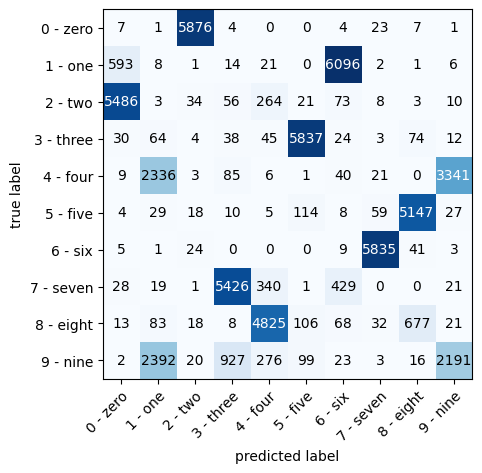

In [ ]:
# true labels vs k-means clustered classification
# as discussed earlier... just like accuracy confusion matrix are not good judge of how well the clustering worked...
# although we could take a look at these dark spots in the conf-matrix and know that these represnt one big cluster when plotted....
confusion_matrix_tensor = confusion_matrix(torch.tensor(cluster_labels), torch.tensor(label))

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix_tensor.numpy(), class_names=test_data.classes)

In [ ]:
# The confusion matrix shows cluster are seperated and not all over the place

# Now we will do this same clustering for classifiaction using Autoencoder.....
#### Use AutoEncoders to encode the data to lower latent representation and cluster on these low dim Data


# then move to more larger and complicated dataset using Autoencoder and variational Autoencoder..

In [39]:
### Build an AutoEncoder

class Encoder(nn.Module):
    def __init__(self, input_shape):
        super().__init__()

        self.encoder_block = nn.Sequential(
            nn.Linear(in_features=input_shape, out_features=128),
            nn.ReLU(),
            
            nn.Linear(in_features=128, out_features=64),
            nn.ReLU(),

            nn.Linear(in_features=64, out_features=12),
            nn.ReLU(),

            nn.Linear(in_features=12, out_features=2),
        )

    
    def forward(self, x):
        return self.encoder_block(x)
    

class Decoder(nn.Module):
    def __init__(self, output_shape):
        super().__init__()

        self.decoder_block = nn.Sequential(
            nn.Linear(in_features=2, out_features=12),
            nn.ReLU(),

            nn.Linear(in_features=12, out_features=64),
            nn.ReLU(),

            nn.Linear(in_features=64, out_features=128),
            nn.ReLU(),

            nn.Linear(in_features=128, out_features=output_shape),
            nn.ReLU()
        )
    
    def forward(self, x):
        return self.decoder_block(x)

In [40]:
class AutoEncoder(nn.Module):
    def __init__(self, input_shape):
        super().__init__()

        self.encoder = Encoder(input_shape=input_shape)
        self.decoder = Decoder(output_shape=input_shape)

    def encode(self, x):
        return self.encoder(x)
    
    def decode(self, x):
        return self.decoder(x)
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [41]:
autoEncoder = AutoEncoder(input_shape=28*28).to(device)

In [42]:
# Initialize loss function, optimizer

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params=autoEncoder.parameters(), lr=0.001)

In [43]:
num_epochs = 3
for epoch in range(num_epochs):
    autoEncoder.train()
    print('____________________________________________')
    print(f'EPOCHS: {epoch+1}')

    total_loss = 0

    for index, (image, label) in (enumerate(tqdm(train_dataloader))):
        image = image.to(device)
        image = image.view(image.shape[0], -1)

        encoded, decoded = autoEncoder(image)

        loss = loss_fn(decoded, image)
        total_loss += loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Total Loss: {total_loss/len(train_dataloader)}')

____________________________________________
EPOCHS: 1


100%|██████████| 1875/1875 [00:10<00:00, 172.56it/s]


Total Loss: 0.05899770185351372
____________________________________________
EPOCHS: 2


100%|██████████| 1875/1875 [00:10<00:00, 179.04it/s]


Total Loss: 0.04953283816576004
____________________________________________
EPOCHS: 3


100%|██████████| 1875/1875 [00:10<00:00, 179.50it/s]

Total Loss: 0.04691886156797409


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

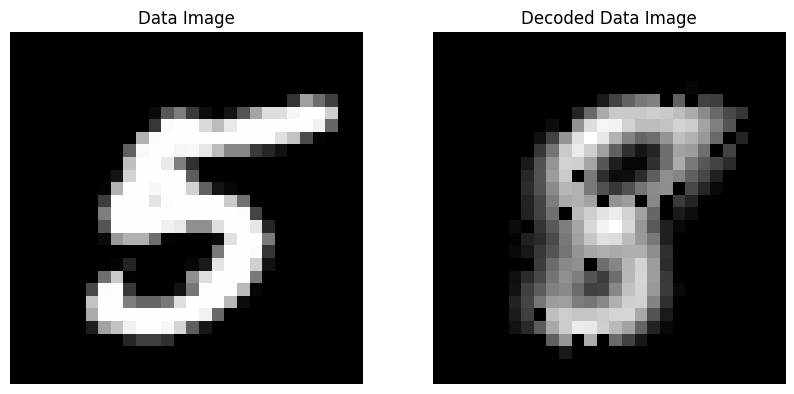

In [44]:
# Generate random integer
rand_int = torch.randint(0, len(train_data)-1, (1,)).item()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# index random data corresponding to the integer
image = train_data[rand_int][0]

# plot the data image
axes[0].imshow(image.permute(1, 2, 0), cmap='gray')
axes[0].set_title('Data Image')
axes[0].axis(False)

# run inference of data on the trained model and get the decoded data
encoded, decoded = autoEncoder(image.view(image.shape[0], -1).to(device))
decoded = decoded.reshape(image.shape).detach().cpu()

# plot the decoded data image
axes[1].imshow(decoded.permute(1, 2, 0), cmap='gray')
axes[1].set_title('Decoded Data Image')
axes[1].axis(False)

In [45]:
with torch.inference_mode():
    autoEncoder.eval()

    encoded_data = []
    label_data = []

    for index, (image, label) in enumerate(tqdm(train_dataloader)):
        image = image.to(device)
        image = image.view(image.shape[0], -1)
        
        encoded = autoEncoder.encode(image)
        encoded_data += encoded
        label_data += label

encoded_data =  torch.stack(encoded_data).detach().cpu()
label_data = torch.stack(label_data)

100%|██████████| 1875/1875 [00:05<00:00, 333.55it/s]


In [46]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10)
kmeans_cluster = kmeans.fit_predict(encoded_data)
cluster_centers = kmeans.cluster_centers_

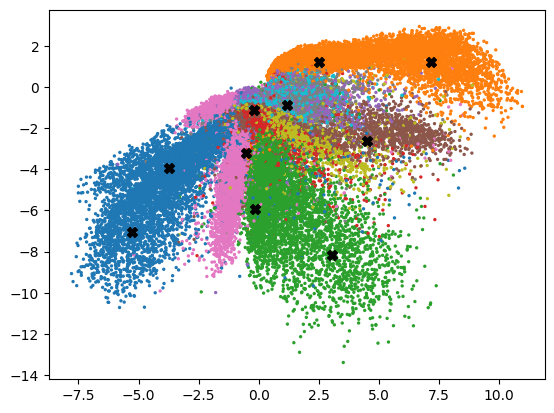

In [47]:
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=label_data, cmap='tab10', s=2)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='X', s=50, label='Centers')

In [48]:
### RESULT: We didnt get good cluster.
### First Intuition: Since we made the Autoencoder with linear layers, it might not have been able to capture the image features properly.
### SO lets try out the CNN Autoencoders

In [49]:
class CNN_Encoder(nn.Module):
    def __init__(self, input_channels):
        super().__init__()

        self.input_channels = input_channels
        
        self.encoder_block = nn.Sequential(
            nn.Conv2d(in_channels=input_channels, out_channels=8, kernel_size=3, padding=1, stride=2), # -> N, 8, 14, 14
            nn.ReLU(),

            nn.Conv2d(in_channels=8, out_channels=32, kernel_size=3, padding=1, stride=2), # -> N, 32, 7, 7
            nn.ReLU(),

            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=2), # -> N, 64, 3, 3
            nn.ReLU(),

            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3), # -> N, 128, 1, 1
        )

        self.flatten = nn.Flatten()

        self.bottleneck = nn.Sequential(
            nn.Linear(in_features=128*1*1, out_features=2)
        )

    def forward(self, x):
        # x -> N, 1, 28, 28 
        encoded = self.encoder_block(x)
        

        flattened = self.flatten(encoded)

        # final = self.bottleneck(flattendd)
        return flattened
        # return final




class CNN_Decoder(nn.Module):
    def __init__(self, output_channels):
        super().__init__()

        self.first_layer = nn.Sequential(
            nn.Linear(in_features=2, out_features=128*1*1) #  -> N, 128
        )


        self.decoder_block = nn.Sequential(
            nn.ConvTranspose2d(in_channels=128, out_channels=64, kernel_size=3, stride=2), # -> N, 64, 3, 3
            nn.ReLU(),

            nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=3, stride=2), # -> N, 32, 7, 7
            nn.ReLU(),
            
            nn.ConvTranspose2d(in_channels=32, out_channels=16, kernel_size=3, padding=1, stride=2, output_padding=1),
            nn.ReLU(), # -> # -> N, 16, 14, 14

            nn.ConvTranspose2d(in_channels=16, out_channels=output_channels, kernel_size=3, padding=1, stride=2, output_padding=1), # -> N, 1, 28, 28
            nn.Sigmoid(), # to get the output values in range of 0 to 1
        )


    def forward(self, x):
        # x = self.first_layer(x)
        x = x.reshape(-1, 128, 1, 1) # (N, 128, 1, 1)
        return self.decoder_block(x)

In [50]:
tensor = torch.rand(20, 1, 28, 28)

encoder = CNN_Encoder(input_channels=1)
x = encoder(tensor)

# flatten = nn.Flatten(start_dim=0)
print(x.shape)


decoder = CNN_Decoder(output_channels=1)
print(decoder(x).shape)

torch.Size([20, 128])
torch.Size([20, 1, 28, 28])


In [51]:
class CNN_AutoEncoder(nn.Module):
    def __init__(self, channels):
        super().__init__()

        self.encoder = CNN_Encoder(input_channels=channels)
        self.decoder = CNN_Decoder(output_channels=channels)

    def encode(self, x):
        return self.encoder(x)

    def decode(self, x):
        return self.decoder(x)

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


# Initialize the model
cnn_autoencoder = CNN_AutoEncoder(channels=1).to(device)

In [52]:
# Initialize loss function, optimizer

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params=cnn_autoencoder.parameters(), lr=0.01)
schedular = torch.optim.lr_scheduler.StepLR(optimizer=optimizer, step_size=3, gamma=0.1)

In [53]:
# Training loop for the CNN AutoEncoder
num_epochs = 3
for epoch in range(num_epochs):
    cnn_autoencoder.train()
    print('_____________________')
    print(f'EPOCH: {epoch+1} | Learning Rate: {optimizer.param_groups[0]['lr']}')

    total_loss = 0

    for image, label in tqdm(train_dataloader):
        image = image.to(device)
        encoded, decoded = cnn_autoencoder(image)

        loss = loss_fn(decoded, image)
        total_loss += loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    schedular.step()
    print(f'Total Loss : {total_loss/len(train_dataloader)}')



_____________________
EPOCH: 1 | Learning Rate: 0.01


100%|██████████| 1875/1875 [00:11<00:00, 165.17it/s]


Total Loss : 0.01863703690469265
_____________________
EPOCH: 2 | Learning Rate: 0.01


100%|██████████| 1875/1875 [00:11<00:00, 158.35it/s]


Total Loss : 0.008103880099952221
_____________________
EPOCH: 3 | Learning Rate: 0.01


100%|██████████| 1875/1875 [00:11<00:00, 167.03it/s]

Total Loss : 0.006527187768369913


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

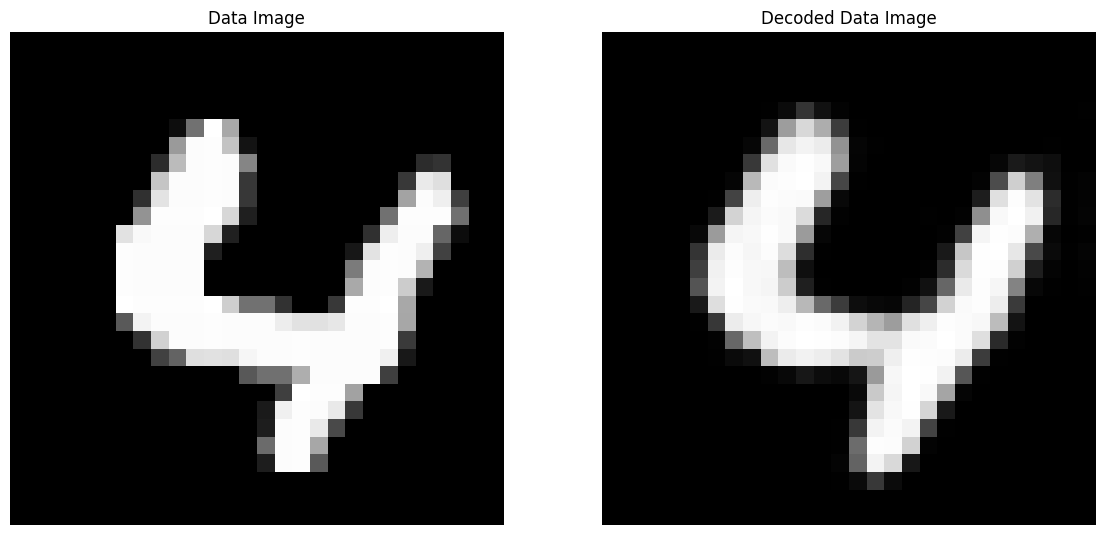

In [54]:
# Generate random integer
rand_int = torch.randint(0, len(train_data)-1, (1,)).item()

# index random data corresponding to the integer
image = train_data[rand_int][0]

# initialize the plot
fig, ax = plt.subplots(1, 2, figsize=(14,7))

# plot the data image
ax[0].imshow(image.permute(1, 2, 0), cmap='gray')
ax[0].set_title('Data Image')
ax[0].axis(False)


# run inference of data on the trained model and get the decoded data
encoded, decoded = cnn_autoencoder(image.unsqueeze(dim=0).to(device))
decoded = decoded.reshape(image.shape).detach().cpu()

# plot the decoded data image
ax[1].imshow(decoded.permute(1, 2, 0), cmap='grey')
ax[1].set_title('Decoded Data Image')
ax[1].axis(False)

In [55]:
### Currently the AutoEncoder Model is just trained to get the high-dim MNIST dataset into low dimension latent represent and reconstruct the image form it.....
### It isn't cluster aware....so we will train it to be aware of cluster.....train it to group the 'latent representation' in cluster 

# (Cluster-Aware Training (recon + clustering loss))